In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
# Fetch the dataset and store in DataFrame
newsgroups_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'text': newsgroups_data.data, 'target': newsgroups_data.target})
print("Sample data:\n", df.head(), "\n")

Sample data:
                                                 text  target
0  I was wondering if anyone out there could enli...       7
1  A fair number of brave souls who upgraded thei...       4
2  well folks, my mac plus finally gave up the gh...       4
3  \nDo you have Weitek's address/phone number?  ...       1
4  From article <C5owCB.n3p@world.std.com>, by to...      14 



In [10]:
# Clean the text data
def clean_text(text):
    text = text.lower()                          # convert to lowercase
    text = re.sub(r'\n', ' ', text)              # remove newline
    text = re.sub(r'[^a-z\s]', '', text)         # remove special chars & numbers
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)
print("Cleaned data sample:\n", df['clean_text'].head(), "\n")

Cleaned data sample:
 0    i was wondering if anyone out there could enli...
1    a fair number of brave souls who upgraded thei...
2    well folks my mac plus finally gave up the gho...
3    do you have weiteks addressphone number id lik...
4    from article cowcbnpworldstdcom by tombakerwor...
Name: clean_text, dtype: object 



In [14]:
# Create a Bag of Words (BoW) model

bow_vectorizer = CountVectorizer(stop_words='english', max_features=10000)    # text into a numerical form — a matrix of word counts
bow_matrix = bow_vectorizer.fit_transform(df['clean_text'])

# Sum the word occurrences
bow_sum = np.array(bow_matrix.sum(axis=0)).flatten()
bow_freq = pd.DataFrame({'word': bow_vectorizer.get_feature_names_out(), 'count': bow_sum})
bow_top20 = bow_freq.sort_values(by='count', ascending=False).head(20)

In [12]:
# Create a TF-IDF model

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Compute total TF-IDF score per word
tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()
tfidf_freq = pd.DataFrame({'word': tfidf_vectorizer.get_feature_names_out(), 'tfidf_score': tfidf_sum})
tfidf_top20 = tfidf_freq.sort_values(by='tfidf_score', ascending=False).head(20)

In [ ]:
# Common words effect
Common words get high values - BOW
Common words get downweighted - TDIDF

Sample data:
                                                 text  target
0  I was wondering if anyone out there could enli...       7
1  A fair number of brave souls who upgraded thei...       4
2  well folks, my mac plus finally gave up the gh...       4
3  \nDo you have Weitek's address/phone number?  ...       1
4  From article <C5owCB.n3p@world.std.com>, by to...      14 

Cleaned data sample:
 0    i was wondering if anyone out there could enli...
1    a fair number of brave souls who upgraded thei...
2    well folks my mac plus finally gave up the gho...
3    do you have weiteks addressphone number id lik...
4    from article cowcbnpworldstdcom by tombakerwor...
Name: clean_text, dtype: object 



/tmp/ipython-input-3892207646.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=bow_top20, palette='viridis')
/tmp/ipython-input-3892207646.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tfidf_score', y='word', data=tfidf_top20, palette='plasma')


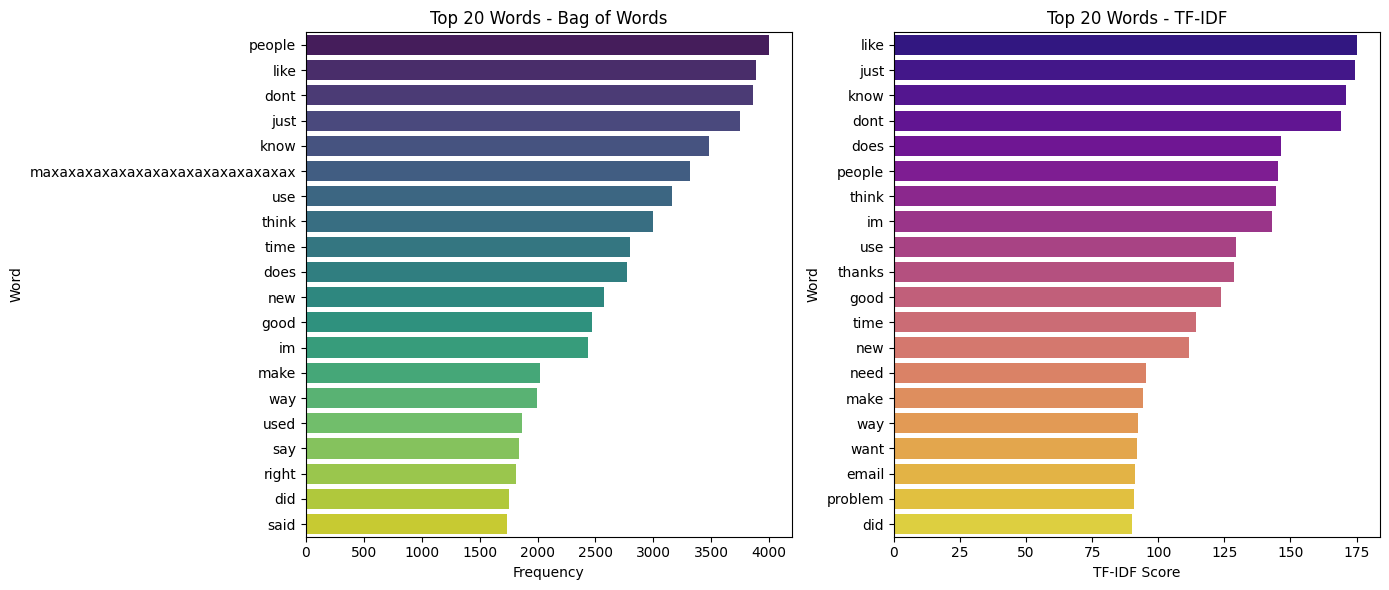


Top 20 word comparison (BoW vs TF-IDF):

                               word   count  tfidf_score
13                           people  3997.0   145.454163
8                              like  3885.0   175.131539
2                              dont  3862.0   169.314464
6                              just  3747.0   174.575522
7                              know  3482.0   170.897517
10  maxaxaxaxaxaxaxaxaxaxaxaxaxaxax  3317.0     0.000000
21                              use  3161.0   129.420337
19                            think  2999.0   144.714843
20                             time  2800.0   114.175072
1                              does  2773.0   146.267388
12                              new  2571.0   111.701138
4                              good  2474.0   123.562388
5                                im  2436.0   142.988947
9                              make  2022.0    94.217914
24                              way  1991.0    92.367123
22                             used  1865.0   

In [7]:
# Compare both models — visualize

plt.figure(figsize=(14, 6))

# Bag of Words
plt.subplot(1, 2, 1)
sns.barplot(x='count', y='word', data=bow_top20, palette='viridis')
plt.title("Top 20 Words - Bag of Words")
plt.xlabel("Frequency")
plt.ylabel("Word")

# TF-IDF
plt.subplot(1, 2, 2)
sns.barplot(x='tfidf_score', y='word', data=tfidf_top20, palette='plasma')
plt.title("Top 20 Words - TF-IDF")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")

plt.tight_layout()
plt.show()


# Display Top 20 words comparison table

comparison = pd.merge(
    bow_top20, tfidf_top20, on='word', how='outer'
).fillna(0).sort_values(by='count', ascending=False)
print("\nTop 20 word comparison (BoW vs TF-IDF):\n")
print(comparison)
